In [4]:
import random
import numpy as np
from glob import glob
from natsort import natsorted
from Source.Trainer import BinarySegmentationTrainer
from Source.Utils import create_dir, show_sample_overlay

from Datasets import download_line_dataset_light

In [ ]:
dataset_path = download_line_dataset_light()
print(dataset_path)

In [5]:
train_images = natsorted(glob(f"{dataset_path}/train/images/*.jpg"))
train_masks = natsorted(glob(f"{dataset_path}/train/mask/*.png"))
val_images = natsorted(glob(f"{dataset_path}/val/images/*.jpg"))
val_masks = natsorted(glob(f"{dataset_path}/val/mask/*.png"))
test_images = natsorted(glob(f"{dataset_path}/test/images/*.jpg"))
test_masks = natsorted(glob(f"{dataset_path}/test/mask/*.png"))


print(f"Training data => Images: {len(train_images)}, Masks: {len(train_masks)}")
print(f"Validation data => Images: {len(val_images)}, Masks: {len(val_masks)}")
print(f"Test data => Images: {len(test_images)}, Masks: {len(test_masks)}")

Training data => Images: 5608, Masks: 5608
Validation data => Images: 5560, Masks: 5560
Test data => Images: 5236, Masks: 5236


In [6]:
patch_size = 512
batch_size = 32

In [7]:
output_dir = "Output"
create_dir(output_dir)

segmentation_trainer = BinarySegmentationTrainer(
    train_x=train_images,
    train_y=train_masks,
    valid_x=val_images,
    valid_y=val_masks,
    test_x=test_images,
    test_y=test_masks,
    image_width=patch_size,
    image_height=patch_size,
    batch_size=batch_size,
    network="deeplab",
    output_path=output_dir
    )

Initializing Binary Segmentation trainer...
Checking dataloaders...
done!


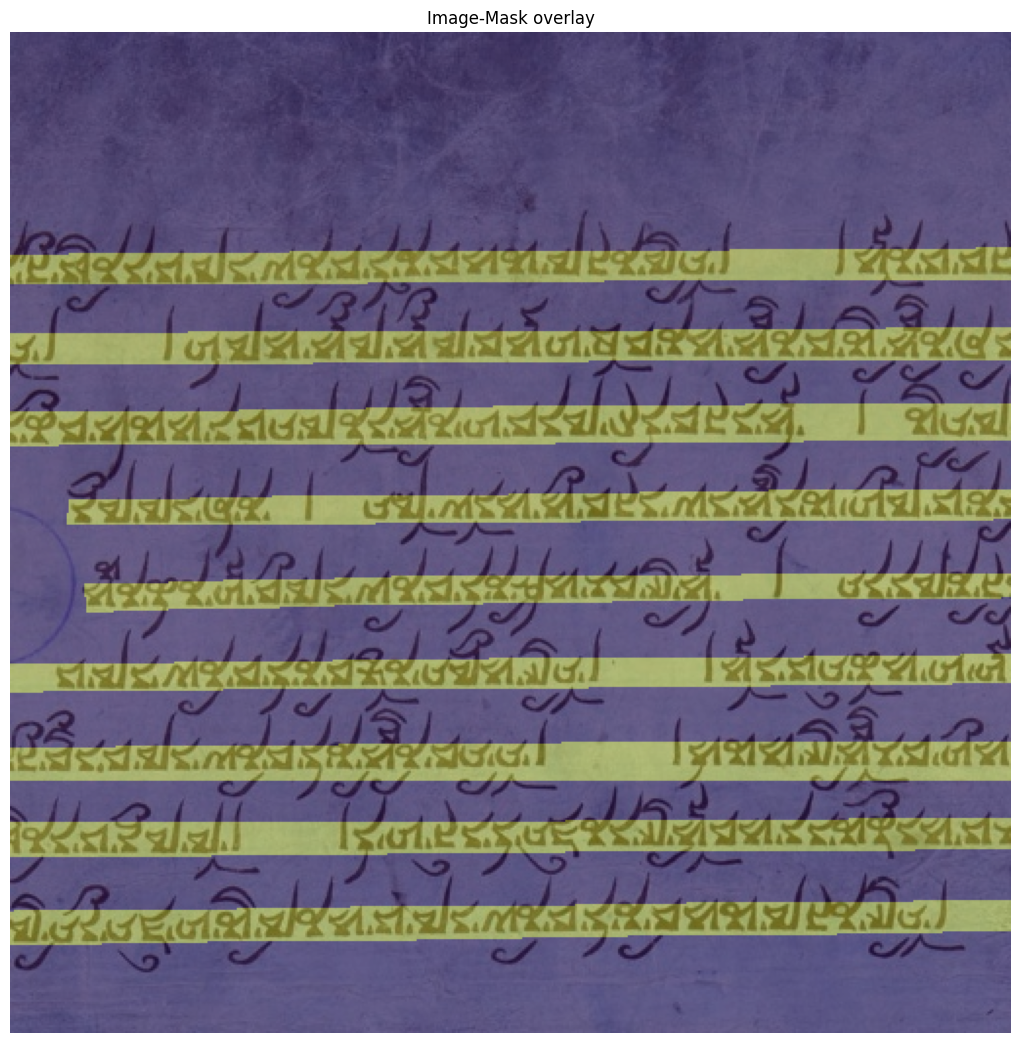

In [8]:
# visualize an example from the train set
train_sample = next(iter(segmentation_trainer.train_dl))
train_img, train_mask = train_sample
train_img = train_img.numpy()
train_mask = train_mask.numpy()
train_img = np.transpose(train_img, axes=[0, 2, 3, 1])

b_idx = random.randint(0, train_img.shape[0])
show_sample_overlay(train_img[b_idx], train_mask[b_idx])

In [ ]:
epochs = 1
segmentation_trainer.train(epochs=epochs)